In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import fisher_exact, ranksums,spearmanr
from matplotlib import pyplot as plt
from tqdm import tqdm

import gseapy as gp

import os
os.chdir('/lustre/scratch/kiviaho/club_scrnaseq/')


# Download gene sets and keep those needed
gene_set_df = pd.read_excel('custom_gene_lists.xlsx',header=None).drop(columns=0).set_index(1).T

def load_from_pickle(filename):
    import pickle
    with open(filename, 'rb') as handle:
        obj = pickle.load(handle)
    return obj

def check_top_markers(r,p_thresh=0.05):
    # These results rank the deg significance and specificity (low p-value = good marker)
    deg_fishers_res_dict = load_from_pickle('/lustre/scratch/kiviaho/prostate_spatial/data/region_gene_markers_fishers_exact_test_240229.pkl')

    fishers_test_df = deg_fishers_res_dict[r].rename(columns={'interaction':'gene','active_in':'deg in'})
    fishers_test_df = fishers_test_df.sort_values('adj_pval').reset_index(drop=True)
    fishers_test_df = fishers_test_df[fishers_test_df['adj_pval'] < p_thresh]

    return fishers_test_df

def remove_overlaps(data):
    # Convert lists to sets for easier comparison
    sets = {k: set(v) for k, v in data.items()}
    
    # Iterate over each pair of lists
    for key1, set1 in sets.items():
        for key2, set2 in sets.items():
            if key1 != key2:
                # Find the intersection
                intersection = set1 & set2
                if intersection:
                    # Remove intersection from the longer list
                    if len(set1) > len(set2):
                        sets[key1] -= intersection
                    else:
                        sets[key2] -= intersection
    
    # Convert sets back to lists
    return {k: list(v) for k, v in sets.items()}



plot_save_path = '/lustre/scratch/kiviaho/hillock_club_senescence/plots/'

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ygqasbwd because the default path (/run/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [19]:
[print(k)for k in gene_set_df.columns]

CRPCsig51
Hillock
Club
Basal
Luminal
Persist
PROSGenesis
AR signaling
NEPC
PAM50 LumA down
PAM50 LumB down
PAM50 Basal down
AR-A
PORTOS
Decipher
sensescent epithelium
cycling epithelium 1
stress signaling epithelium
cycling epithelium 2
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
Luminal progenitor
Lung club
Lung KRAS 
Lung KAC
Lung other AICs
Necrosis
Angiogenesis
B cells
Mast cells
Monocytes
Th17 cells
Treg cells
M1 macrophages
M2 macrophages
T-cell exhaustion
MDSC Hirz 2023
T-regulatory activity
CD300LD downstream
CD47 associated genes
MDSC Alshetaiwi 2020
MDSC Calcinotto 2018
High NLR-associated
SASP upregulated
MP1  Cell Cycle - G2_M
MP2  Cell Cycle - G1_S
MP3  Cell Cylce HMG-rich
MP4  Chromatin 
MP5 Stress 
MP6 Hypoxia
MP7 Stress (in vitro)
MP8 Proteasomal degradation
MP9 Unfolded protein response
MP10 Protein maturation
MP11 Translation initiation
MP12 EMT-I
MP13 EMT-II
MP14 EMT-III 
MP15 EMT IV
MP16 MES (glioma)
MP17 Interferon_MHC-II (I)
MP18 Interferon_MHC-II (II)
MP19 Epithelial Senes

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [35]:
lst = ['Hillock','sensescent epithelium','Lung KRAS ','MP19 Epithelial Senescence']
df = gene_set_df[lst]
df = df.to_dict('list')

set(df[lst[0]]).intersection(
    set(df[lst[1]]).intersection(
        set(df[lst[2]]).intersection(
            set(df[lst[3]])
        )
    )

)

{'CLDN4', 'PSCA', 'S100P', nan}

In [36]:
for g in gene_set_df['sensescent epithelium']:
    print(g)
    for k in gene_set_df:
        if g in gene_set_df[k].tolist():
            print(k)
    print()

SLPI
Club
sensescent epithelium
Lung other AICs
CD300LD downstream
MP19 Epithelial Senescence
MP23 Secreted II
MP31 Alveolar
MP40 PDAC-related
Squamous
HALLMARK_KRAS_SIGNALING_UP

WFDC2
Club
sensescent epithelium
Luminal progenitor
Lung club
Lung KAC
MP18 Interferon_MHC-II (II)
MP19 Epithelial Senescence
MP23 Secreted II
Glandular

CRABP2
Club
sensescent epithelium
Lung KAC
MP19 Epithelial Senescence
Squamous
HALLMARK_PEROXISOME

ASS1
Hillock
Club
sensescent epithelium
CRPC-SCL
MP15 EMT IV
Basal_pancancer
HALLMARK_ESTROGEN_RESPONSE_LATE

S100A6
Club
sensescent epithelium
MDSC Alshetaiwi 2020
MP14 EMT-III 
MP33 RBCs
MP39 Metal-response
pEMT

KRT7
sensescent epithelium
MP13 EMT-II
MP14 EMT-III 
MP19 Epithelial Senescence
pEMT

RARRES1
Club
sensescent epithelium
Lung club
MP23 Secreted II

GSTP1
sensescent epithelium

KRT19
PROSGenesis
sensescent epithelium
CRPC-SCL
Luminal progenitor
Lung KRAS 
MP14 EMT-III 
MP23 Secreted II
pEMT
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_ESTROGEN_RESPONSE_EARL

In [58]:

gene_modules_dict = {
    'scNMF senescent epithelium':gene_set_df['sensescent epithelium'].dropna().tolist(),
    'AR signaling':gene_set_df['AR signaling'].dropna().tolist(),
    'Tumor region markers': check_top_markers('Tumor')['gene'].tolist(),
    'Luminal region markers': check_top_markers('Luminal epithelium')['gene'].tolist(),
    'Basal region markers': check_top_markers('Basal epithelium')['gene'].tolist(),
    'Club region markers': check_top_markers('Club epithelium')['gene'].tolist(),
    'Club Henry et al. 2018': ['SCGB3A1','LCN2','PIGR','PSCA','OLFM4','RARRES1','SPINK1','CD74','S100P','WFDC2','FCGBP','GDF15','AGR2','HLA-DRA','PI3','FAM3D','SLPI','C15orf48','TXNIP','DUOXA2','ANKRD36C','CXCL17','TMSB4X','ADGRF1','VSIG2','HLA-DRB1','TFF1','CRABP2','CLDN3','ASS1','RHOV','CEACAM6','B2M','CP','TMEM45B','SRD5A3','PDZK1IP1','AGR3','CEACAM5','BIK','LINC01207','HLA-DRB5','SCCPDH','MMP7','ZG16B','TSPAN3','ELF3','NEAT1','S100A6','AZGP1','PPDPF','MAL2','FOXO3','RAB11FIP1','CYP3A5','FTH1','REEP3','ADIRF','CXCL6','GPRC5A','GLUL','DUSP5','CD24','TMEM165','MGST1','HPGD','CYP1B1','SAA1','GPX2'],
    'Hillock Henry et al. 2018': ['KRT13','S100P','APOBEC3A','GDF15','CSTB','DUOXA2','OLFM4','GPX2','LYPD3','CXCL17','AKR1C1','SERPINB1','AKR1C2','IGFBP3','IL1RN','MUC4','SDCBP2','HPGD','ADIRF','CLDN4','DHRS9','TRIM31','GPRC5A','EMP1','C15orf48','SNCG','DUSP5','ADGRF1','RAB11FIP1','MGST1','TMSB4X','CLDN3','SDC1','TMPRSS4','MAL2','C9orf16','ASS1','PIM1','DAPP1','PPARG','CLDN7','HEBP2','ELF3','OAS1','AQP3','OAF','CLCA4','CDKN2B','PSCA','PLAUR','S100A9','DDIT4','CCL20','AREG'],
    'Club-like senescence': ['AGR2','AQP3','CLDN4','CLDN7','CRABP2','CXCL17','ELF3','GPRC5A','IGFBP3','KRT13','KRT16','KRT17','KRT7','LCN2','MAL2','MUC4','PDZK1IP1','PI3','PRSS22','S100A9','S100P','SAA1','SERPINB1','SLPI','TACSTD2','WFDC2'],
    'IL1A_IL1B_prostate': ['IL1A', 'PTGS2', 'IL1B', 'CXCL3', 'TNFAIP3', 'IER3', 'CCL3', 'NFKBIZ', 'NFKBIA', 'CXCL2', 'SOD2', 'LUCAT1', 'PLEK', 'CCL20', 'KYNU', 'G0S2', 'NAMPT', 'PNRC1', 'PPIF', 'BCL2A1', 'CD93', 'EREG', 'NLRP3', 'THBS1', 'AQP9', 'CD55', 'ACSL1', 'FNDC3B', 'TREM1', 'C5AR1', 'ELL2', 'CD44', 'DUSP6', 'AREG', 'WTAP', 'TNFAIP6', 'B4GALT5', 'GCH1', 'IL1RN', 'MXD1', 'ATP2B1', 'ATP13A3', 'EHD1', 'CXCL1', 'SLC25A37', 'SAMSN1', 'OLR1', 'ZEB2', 'EAF1', 'RNF19B', 'THBD', 'OTUD1', 'CXCL8', 'ANPEP', 'SERPINB2', 'TIMP1', 'CCL4', 'CCL3L1', 'SAV1', 'BTG1', 'S100A8', 'SRGN', 'ICAM1', 'GK', 'FCN1', 'VCAN', 'RASGEF1B', 'MARCKS', 'S100A9', 'SLC11A1', 'NEAT1'],
    'JAK_STAT_FGFR': ['IRF9','STAT1','STAT2','CCND3','STAT3','IL13RA1','IL11RA1','AKT3','SPRED1','IL10RB','CCND1','PIK3R1','SOCS2','SPRY1','JAK1','PIK3R2','IFNAR1','STAM','STAT5B','PIAS2','AKT2','PTPN11','STAT5A','JUN','CXCL10','CD44','CXCL2','TNF','CD14','TNFRSF1B','BAK1','IRF1','CSF1','FGF1','FGF10','FGF17','FGF18','FGF19','FGF2','FGF20','FGF22','FGF23','FGF3','FGF4','FGF5','FGF6','FGF7','FGF8','FGF9','FGFR1','DUSP6','TGIF','SMAD3','SMAD2','THBS1','FOS','TGFBR2','SOX9','TGFB1','FKBP1A','MMP15','FGFR2','FGFR3'],
    'JAK_STAT_ACTIVATORS_LIGANDS':["IFNA", "IFNB", "IFNG", "IGF1", "EGF", "PDGF", "CSF1", "KITLG", "FGF1", "FGF2", "FGF10", "FGF9", "BDNF", "VEGF", "HGF", "GH", "TPO", "EPO","PRL", "IL3", "IL5", "IL2", "IL4", "IL6", "LIF", "IL7", "IL9", "IL13","IL15", "IL21", "IL11", "CTF1", "OSM", "CSF3", "LEP", "IL31", "CNTF","IL10", "IL19", "IL20", "IL22", "IL24", "IL26", "IL28A", "IL28B", "IL29","IL12", "IL23", "IL27", "AGT", "F2", "BDK", "PTAF", "CXCL12", "CCL2","CCL5", "CCL15"],
    'JAK_STAT_ACTIVATORS_RECEPTORS':['IFNAR2','IFNBR2','IFNGR2','IGF1R','EGFR','PDGFR','CSF1R','KIT','FGFR1','FGFR2','FGFR3','FGFR4','FGFR1','FGFR2','FGFR3','FGFR4','FGFR1','FGFR2','FGFR3','FGFR4','FGFR1','FGFR2','FGFR3','FGFR4','NTRK2','VEGFR1','VEGFR2','VEGFR4','MET','GHR','TPOR','EPOR','PRLR','IL3RA','IL5RA','IL2RA','IL4RA','IL6RA','IL6ST','LIFR','IL7RA','IL9RA','IL13RA','IL15RA','IL21RA','IL11RA','CTF1R','OSMR','CSF3R','LEPR','IL31RA','CNTFR','IL10RA','IL19RA','IL20RA','IL22RA','IL12RA','IL12RA','IL12RA','IL12RA','IL12RA','IL12RA','IL23RA','IL27RA','AGTR','F2RL1','F2RL2','F2RL3','BDKRB2','PTAFR','CXCR4','CCR2','CCR5','CCR1'],
    'PDAC T cells': ['LTB','CD2','IL7R','SPOCK2','CCR6','TRAC','ICOS','TRBC1','KLRB1','CD3D','TRBC2','GPR171','CD3E','CCR7','ITK','CD3G','CLEC2D','P2RY10','LCK','BICDL1','GIMAP7','CYTIP','SC5D','LEPROTL1','RCAN3','GNLY','NKG7','CCL5','GZMB','GZMA','KLRD1','PRF1','GZMH','GZMK','CTSW','XCL2','CD8A','GZMM','CST7','CCL4','LINC01871','CD7','CD247','CD96','SH2D2A','SYTL3','APOBEC3G','RUNX3','ARHGAP9','PTPN22'],
    'NK cells': ['NKG7','GNLY','CD8A'],
    'PDAC Macrophages': ['APOC1','C1QB','APOE','C1QC','C1QA','SPP1','CCL3L1','CCL3','TREM2','MSR1','GPNMB','MS4A7','SLCO2B1','FCGR3A','FCGR2A','MS4A4A','SLC16A10','CD14','CSF1R','RNASE1','CD68','SDS','VSIG4','MRC1','CYBB'],
    'PDAC Neutrophils': ['S100A8','CXCL8','FCGR3B','IL1R2','S100A12','PROK2','NAMPT','CSF3R','CMTM2','S100A9','BCL2A1','AC245128.3','ADGRG3','IFITM2','AL034397.3','SAMSN1','IVNS1ABP','AQP9','PTGS2','GCA','BASP1','G0S2','FPR1','PLEK','PHACTR1','FPR2','LITAF','ANP32A','ACSL1','MNDA','RIPOR2','NCF1','ALOX5AP','CPD','SMIM25','TREM1','IRAK3','SRGN','RNF149','NABP1','LST1','NSMAF','LCP1','MME','SLA','SELL','CXCR2','LCP2','HCAR2','C5AR1'],
    'PDAC Monocytes': ['S100A8','FCN1','S100A9','S100A12','SERPINB2','EREG','CD300E','AC245128.3','APOBEC3A','NLRP3','SLC11A1','AQP9','THBS1','FPR1','MCEMP1','C5AR1','IL1B','SMIM25','ATP2B1-AS1','CSF3R','SLC43A2','CFP','IL1R2','THBD','FPR2'],
    'PDAC Dendritic cells': ['CEBPB','IL10','NOS2','RORC','S100A8','SOCS1','SOCS3','TGFB1','IL6','CSF2','CSF1','FLT3LG','ARG1','PTGS2','VEGFA','TNF','S100A9','CYBB','NCF1','NCF4','CSF3R','CXCL8','MNDA','LYZ','NCF2','SELL','ICAM1','CD63','CD274','OLR1'],
    'PDAC T1RS': ['LIPH','SCNN1A','CXCL5','LRG1','MMP7','CEACAM6','PTGS2','C15orf48','TMC5','PRSS22','CFB','LYN','CEACAM5','CXCL6','ZC3H12A','CCL20','EPS8L3','SMOX','SORD','DUOX2','CSF2','CHI3L1','DUOXA2','CXCL3','PIGR','VNN1','ICAM1','C3','TNFAIP2','H6PD','CXCL1','CEACAM7','GK','C9orf16','CEACAM1','CXCL2','NOS2','SFTPD','CSF3','EXOC3L4','LBP','PLA1A','CCL2','LTF','CEBPD','MUC13','NFKBIA','TNIP3','CD14','SLC11A2','PGLYRP1','GK3P','CEACAM8','CEACAM3','PLET1','MICALL2','ERO1A','IL36A','VNN3','CFHR4'],
    'PMN-MDSC activity': ['RPL21','XAF1','CLEC5A','CAMP','CD63','LTF','ANXA3','S100A8','OAS2','ALOX5','IFIT1','CD177','S100A9','CEBPE','LCN2','ANXA1','CTSG','MPO','GSTM1','MEGF9','PYGL','PRTN3','YTHDF3','EMILIN1','ELANE','CHI3L1','LTA4H','VILL','HMGN2','C3','MS4A3','ITGAM','CLEC12A','CST7','HSD11B1','C5AR1','F13A1','ADPGK','HP','IDH1','DHRS7','PGLYRP1','MMP9','ALDH3B1','IGSF6','CYBB','AP3S1','NKG7','RAB31','MSRA','OAS3','SLPI','SYNE1','MECR','PRDX5','MCFD2','RAB3D','PILRA','SCP2','ALAS1','CPNE3','NCF1','MAPKAPK3','ACOT7','CD9','IFITM3','MMP8','PLAC8','NAMPT','ZMPSTE24','ARHGDIB','LGALS1','PADI4','ENO1','DSTN','IFI27L1','MYO1F','ETHE1','CEACAM1','SH3BGRL3','GSN'],
    'scNMF club_interferon':['HLA-DRA','CD74','HLA-DRB1','HLA-DPA1','HLA-DQB1','HLA-DMA','CP','LXN','HLA-DPB1','HLA-B','MMP7','C3','HLA-A','HLA-DRB5','SCUBE2','HLA-DQA1','PDZK1IP1','LTF','SOD2','TGM2','PIGR','MGP','TNFAIP2','RARRES3','C1S','C1R','SAA1','CLU','SELENBP1','BIRC3','CXCL2','SLC40A1','FAM3D','SERPING1','HLA-DMB','CFTR','HLA-F','NNMT','IFITM3','SLFN5','CD59'],
    'PMN_MDSC_signature' : ['STAT1','STAT3','STAT6','NFKB1','IRF1','S100A9','S100A8','ANXA1','LYZ2','CXCL1','CXCL2','CXCR1','CXCR2','CXCL8','LILRA3','TREM1','PTGS2','ARG1','ARG2''TGFB1','VEGF','IL6','CSF1','IL1B','WFDC17','IL4R','OLR1','CD84'],
    'Hirz MDSCs': ['CEBPB','IL10','NOS2','RORC','S100A8','SOCS1','SOCS3','TGFB1','IL6','CSF2','CSF1','FLT3LG','ARG1','PTGS2','VEGFA','TNF','S100A9','CYBB','NCF1','NCF4','CSF3R','CXCL8','MNDA','LYZ','NCF2','SELL','ICAM1','CD63','CD274','OLR1'],
    'Calcinotto MDSCs': ['CCL15','CCL18','CCL19','CCL20','CCL23','CCL24','CCL27','CCL3','CCL3L3','CCL4','CCL4L2','CXCL10','CXCL12','CXCL13','CXCL16','CXCL6','CXCR1','CXCR2','CXCR3','CXCR4','CXCR5','CXCR6','IFNA1','IFNA10','IFNA13','IFNA14','IFNA16','IFNA17','IFNA2','IFNA21','IFNA4','IFNA5','IFNA6','IFNA7','IFNA8','IFNAR2','IFNB1','IFNG','IL10','IL10RA','IL11RA','IL12A','IL12B','IL12RB1','IL12RB2','IL13','IL17B','IL17F','IL17RA','IL18RAP','IL19','IL1A','IL1B','IL1R2','IL1RAP','IL1RL1','IL1RN','IL21','IL22','IL22RA2','IL23A','IL23R','IL24','IL27','IL2RA','IL2RB','IL2RG','IL4','IL4R','IL5','IL5RA','IL6','IL7','IL7R','IL9','LTA','LTB','LTF','MPO','TGFB2','TNFRSF11B','TNFRSF13C','TNFRSF14','TNFRSF17','TNFRSF18','TNFRSF4','TNFRSF8','TNFSF10','TNFSF11','TNFSF14','TNFSF4','TNFSF8'],
    'Alshetaiwi MDSCs': ['IFITM3','IFITM2','IFITM1','IL1B','CSTA','SRGN','PROK2','JUNB','DUSP1','SOCS3','BTG1','C19orf12','SELPLG','ASPRV1','IGFBP6','SIRPG','SIRPB1','SIRPA','PLA2G7','CSF3R','CXCR2','TPD52','TSPO','CYP4F3','GRINA','FABP5','CLEC4D','STEAP4','CCR1','LRG1','CLEC4E','CTSD','CD84','GCNT2','ARG2','NPL','FGL2','RNF149','SEPHS2','S100A6','LMNB1','EIF4EBP1','MSRB1','UBB','C5AR1','YPEL3','FCGR2B','FCGR2A','FCGR2C','GSR','TALDO1','ATP6V1G1','S100A11','HP','HPR','ALOX5AP','LITAF','TXN','UPP1','C19orf38','GPCPD1','SNAP23','IL4R','RETNLB','MYD88','ADIPOR1','STK17B','ZYX','RGS3','HDC','ATG3','GDA','SLC40A1','TARM1','CDK2AP2','GLIPR2','TACSTD2','PICALM','MTUS1','FBXL5','SLFN12','SLFN12L','RND1','IER2','MXD1','SIGLEC8','SIGLEC9','SIGLEC7','SIGLEC12','CDKN2D','CD33','SIGLEC6','CD14','SELL','PPT1','SKAP2','SFXN5','ATP11B','OSM','IER3','HBA2','HBA1']
}

# Test the function
[print(f'{k}: {len(gene_modules_dict[k])}') for k in list(gene_modules_dict.keys())]

#### REMOVE THE OVERLAPS BETWEEN GENE SIGNARTURES TO ENSURE AN UNBIASED CORRELATION ANALYSIS ####
#gene_modules_dict = remove_overlaps(gene_modules_dict)
print('')
[print(f'{k}: {len(gene_modules_dict[k])}') for k in list(gene_modules_dict.keys())]

all_genes = combined_list = [item for sublist in gene_modules_dict.values() for item in sublist]


scNMF senescent epithelium: 90
AR signaling: 20
Tumor region markers: 569
Luminal region markers: 1776
Basal region markers: 46
Club region markers: 452
Club Henry et al. 2018: 69
Hillock Henry et al. 2018: 54
Club-like senescence: 26
IL1A_IL1B_prostate: 71
JAK_STAT_FGFR: 63
JAK_STAT_ACTIVATORS_LIGANDS: 57
JAK_STAT_ACTIVATORS_RECEPTORS: 74
PDAC T cells: 50
NK cells: 3
PDAC Macrophages: 25
PDAC Neutrophils: 50
PDAC Monocytes: 25
PDAC Dendritic cells: 30
PDAC T1RS: 60
PMN-MDSC activity: 81
scNMF club_interferon: 41
PMN_MDSC_signature: 27
Hirz MDSCs: 30
Calcinotto MDSCs: 92
Alshetaiwi MDSCs: 102

scNMF senescent epithelium: 90
AR signaling: 20
Tumor region markers: 569
Luminal region markers: 1776
Basal region markers: 46
Club region markers: 452
Club Henry et al. 2018: 69
Hillock Henry et al. 2018: 54
Club-like senescence: 26
IL1A_IL1B_prostate: 71
JAK_STAT_FGFR: 63
JAK_STAT_ACTIVATORS_LIGANDS: 57
JAK_STAT_ACTIVATORS_RECEPTORS: 74
PDAC T cells: 50
NK cells: 3
PDAC Macrophages: 25
PDAC Ne

## Gene set scores and group comparisons

In [72]:
rnaseq_data = pd.read_csv('./arneo_rnaseq_data_cpm.csv',index_col=0)
metadata = pd.read_csv('./arneo_rnaseq_metadata.csv',index_col=0)

# Match the ordering
rnaseq_data = rnaseq_data[metadata.index]

In [73]:
# Need to run new scoring after getting rid of the overlap between two genes
gsva_res = gp.gsva(data=rnaseq_data,gene_sets=gene_modules_dict,outdir=None,min_size=0,max_size=100000)
gsva_res_df = gsva_res.res2d.pivot(index='Name', columns='Term', values='ES').reset_index(names='Sample Identifier')

# Add and format treatment groups
gsva_res_df['TRT_GROUP'] = gsva_res_df['Sample Identifier'].map(metadata['TRT_GROUP'].to_dict())
gsva_res_df['TRT_GROUP'] = pd.Categorical(gsva_res_df['TRT_GROUP'],categories=['treatment-naive','adt','adt_apa'])

gsva_res_df.loc[:,gene_modules_dict.keys()] = gsva_res_df.loc[:,gene_modules_dict.keys()].astype(np.float64)

<ipython-input-73-403ebd37d14f>:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  gsva_res_df.loc[:,gene_modules_dict.keys()] = gsva_res_df.loc[:,gene_modules_dict.keys()].astype(np.float64)


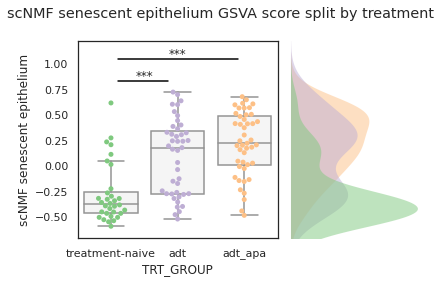

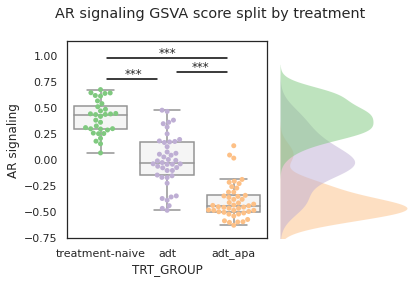

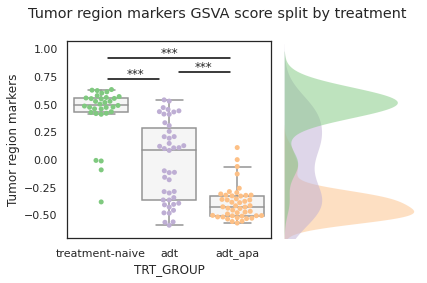

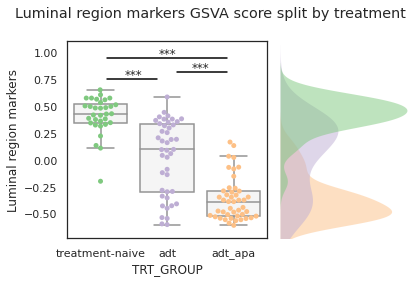

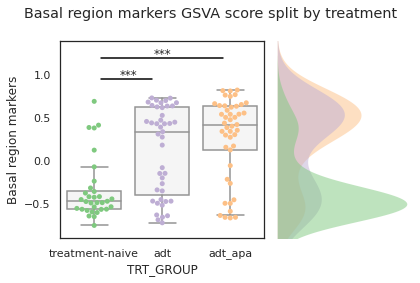

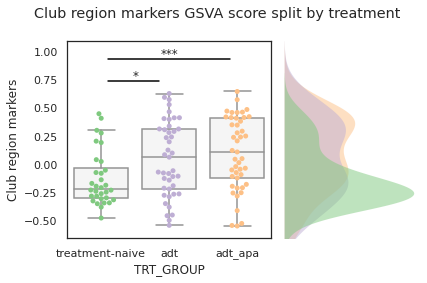

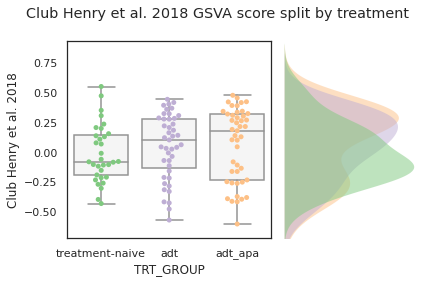

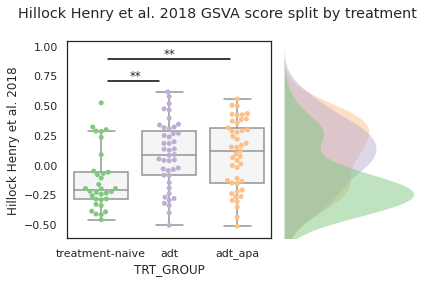

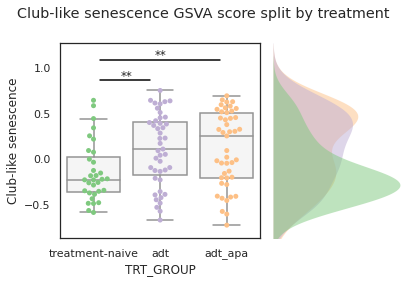

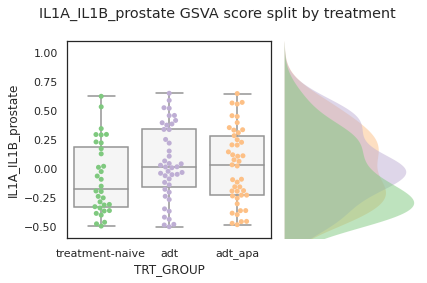

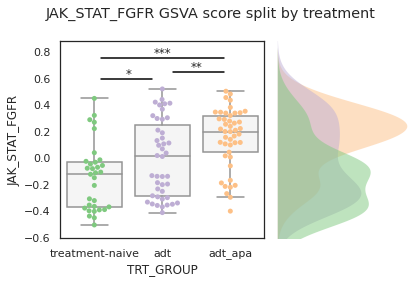

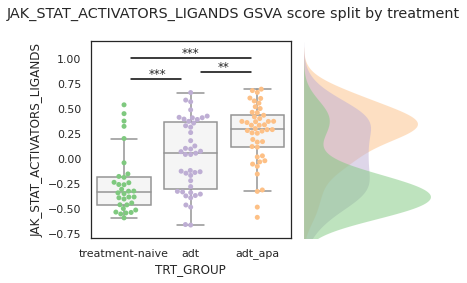

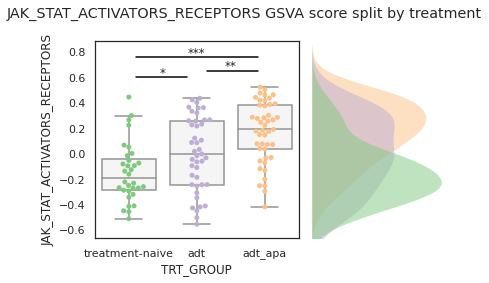

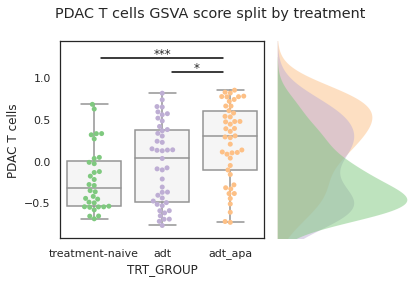

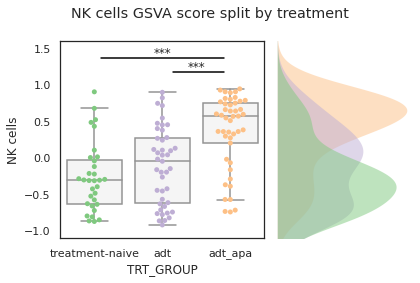

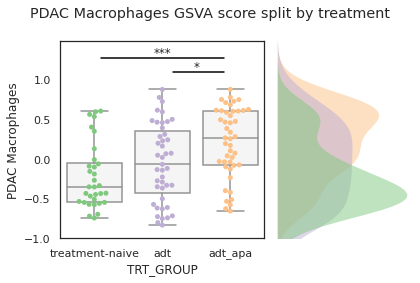

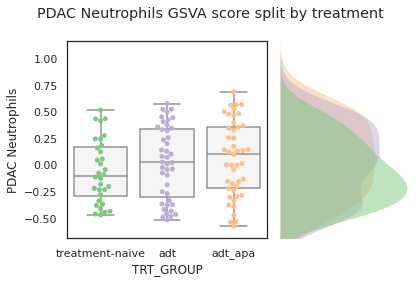

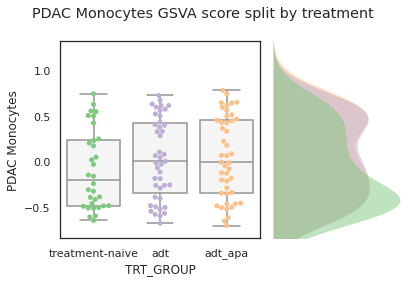

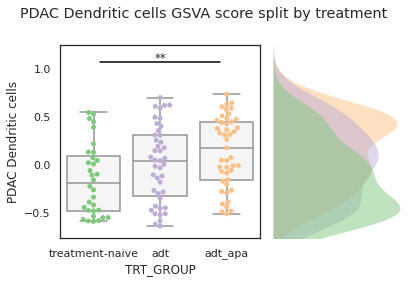

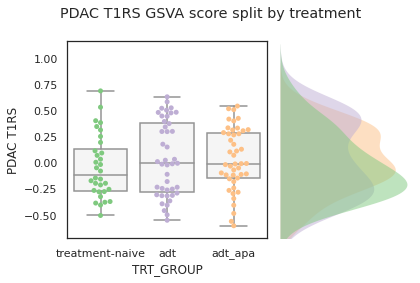

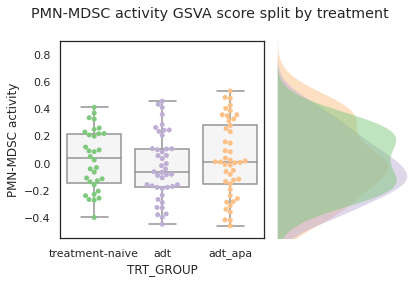

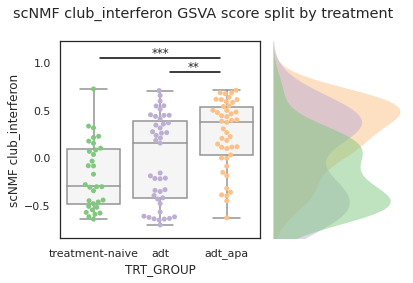

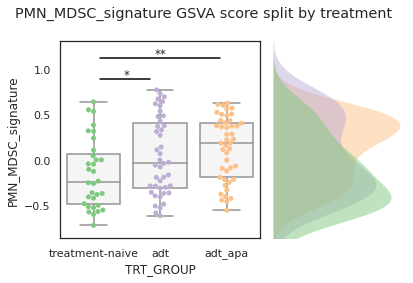

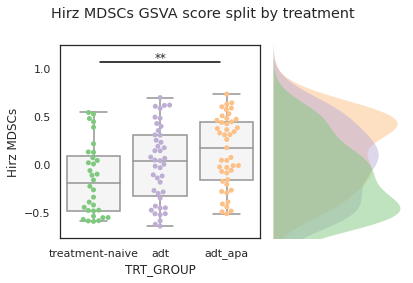

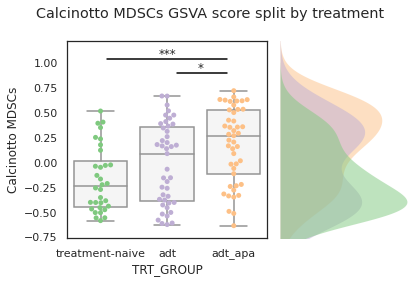

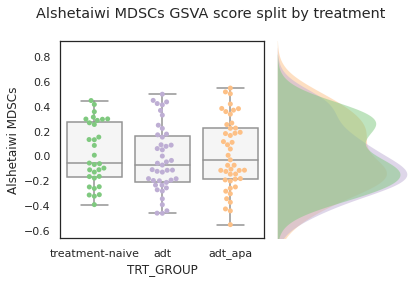

In [76]:
sns.set_theme(style='white',palette='Accent')

# Define the params for drawing significance bars
textprops = [
    {'ymaxm':1.15, 'xmin':0.2,'xmax':0.45,'textx':0.5,'textym':1.17},
    {'ymaxm':1.45, 'xmin':0.2,'xmax':0.8,'textx':1,'textym':1.47},
    {'ymaxm':1.25, 'xmin':0.55,'xmax':0.8,'textx':1.5,'textym':1.27},
]

for score_name in gene_modules_dict.keys():

    min_value = gsva_res_df[score_name].min()
    max_value = gsva_res_df[score_name].max()

    # Create the axes
    fig, axs = plt.subplots(1,2,figsize=(6,4),sharey=False,gridspec_kw={'width_ratios':[3,2]})
    
    ax = axs[0]

    # Plot the box + swarplot on the first axis
    sns.boxplot(data=gsva_res_df, x='TRT_GROUP', y=score_name,color='whitesmoke',ax=ax,fliersize=0)
    sns.swarmplot(data=gsva_res_df, x='TRT_GROUP', y=score_name,hue='TRT_GROUP',ax=ax,legend=None)

    # Get the unique categories in 'TRT_GROUP'
    categories = gsva_res_df['TRT_GROUP'].cat.categories

    # Perform pairwise Wilcoxon rank-sum tests
    it=0
    for i in range(len(categories)):
        for j in range(i+1, len(categories)):
            cat1 = categories[i]
            cat2 = categories[j]
            
            # Get the data for each category
            data1 = gsva_res_df[gsva_res_df['TRT_GROUP'] == cat1][score_name]
            data2 = gsva_res_df[gsva_res_df['TRT_GROUP'] == cat2][score_name]
            
            # Perform Wilcoxon rank-sum test
            statistic, p_value = ranksums(data1, data2)
            asterisks = ''
            if p_value < 0.001:
                asterisks = '***'
            elif p_value < 0.01:
                asterisks = '**'
            elif p_value < 0.05:
                asterisks = '*'

            if p_value < 0.05:
                props_dict = textprops[it]
                ax.axhline(y = max_value*props_dict['ymaxm'], xmin=props_dict['xmin'],xmax=props_dict['xmax'],c='black')
                ax.text(s=asterisks,x=props_dict['textx'],y=max_value*props_dict['textym'],ha='center',fontdict={'fontsize':12})
            it += 1
            
    ax.set_ylim(min_value*1.2,max_value*1.7)

    # Create a kernel density plot on the second ax object
    ax = axs[1]
    sns.kdeplot(
    data=gsva_res_df, y=score_name, hue='TRT_GROUP',
    fill=True, common_norm=False,
    alpha=.5, linewidth=0, legend=None,
    ax=ax
    )
    ax.set_ylim(min_value*1.2,max_value*1.7)

    # Strip all but the plot from this axis
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.suptitle(score_name + ' GSVA score split by treatment')
    plt.tight_layout()

    s = score_name.replace(' ','_').replace('/','_')
    plt.savefig(plot_save_path + f'{s}_gsva_score_split_by_treatment.pdf')
    plt.savefig(plot_save_path + f'{s}_gsva_score_split_by_treatment.png',dpi=120)
    plt.show()

### Gene score correlation plot

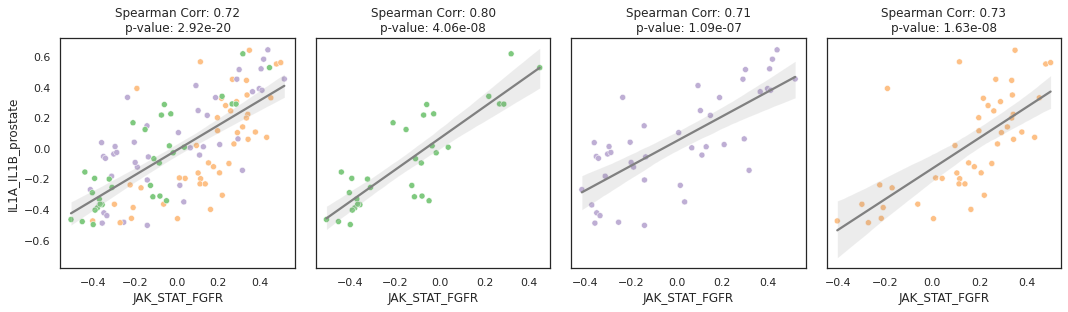

In [108]:
#x_var = 'scNMF senescent epithelium'
#x_var = 'scNMF club_interferon'
#x_var = 'Club region markers'
x_var = 'JAK_STAT_FGFR'
#x_var = 'NK cells'
#x_var = 'Club Henry et al. 2018'
#x_var = 'Club-like senescence'

#y_var = 'scNMF senescent epithelium'
#y_var = 'JAK_STAT_FGFR'
#y_var = 'PDAC Macrophages'
y_var = 'IL1A_IL1B_prostate'
#y_var = 'PDAC T cells'
#y_var = 'PMN-MDSC activity'
#y_var = 'Hillock Henry et al. 2018'
#y_var = 'Tumor region markers'

plot_df = gsva_res_df[gsva_res_df['TRT_GROUP'] == 'treatment-naive'].copy() # treatment-naive, adt, adt_apa
#plot_df = gsva_res_df.copy()

plot_dfs = [
    gsva_res_df.copy(),
    gsva_res_df[gsva_res_df['TRT_GROUP'] == 'treatment-naive'].copy(),
    gsva_res_df[gsva_res_df['TRT_GROUP'] == 'adt'].copy(),
    gsva_res_df[gsva_res_df['TRT_GROUP'] == 'adt_apa'].copy()

]

fig, axs = plt.subplots(1,4,figsize=(15,4.5),sharex=False,sharey=True)

for i,plot_df in enumerate(plot_dfs):
    ax = axs[i]
    xlims = [plot_df[x_var].min() + plot_df[x_var].min()*0.2, plot_df[x_var].max() + plot_df[x_var].max()*0.2]
    ylims = [plot_df[y_var].min() + plot_df[y_var].min()*0.2, plot_df[y_var].max() + plot_df[y_var].max()*0.2]

    # Calculate Spearman correlation
    corr, p_value = spearmanr(plot_df[x_var], plot_df[y_var])

    # Create the scatter plot with regression line

    sns.scatterplot(data=plot_df, x=x_var, y=y_var, hue="TRT_GROUP",legend=False,ax=ax)
    sns.regplot(data=plot_df, x=x_var, y=y_var, scatter=False, color='gray',ax=ax)

    #ax.set_xlim(xlims[0],xlims[1])
    #ax.set_ylim(ylims[0],ylims[1])

    #ax.set_xlabel('')
    #ax.set_ylabel('')

    # Add correlation and p-value text to the plot
    ax.set_title( f'Spearman Corr: {corr:.2f}\np-value: {p_value:.2e}')



x_var_save = x_var.replace(' ','_')
y_var_save = y_var.replace(' ','_')


plt.tight_layout()
# Show the plot

plt.savefig(plot_save_path + f'{x_var_save}_{y_var_save}_correlation_plot.pdf')
plt.show()


### Examine gene modules overlap and DEGs of single genes

In [102]:
signatures = ['JAK_STAT_FGFR','IL1A_IL1B_prostate'] # JAK_STAT_FGFR, JAK_STAT_ACTIVATORS, scNMF senescent epithelium, 'Club Henry et al. 2018','scNMF club_interferon', PMN-MDSC activity, PMN_MDSC_signature

# Ensure all genes are present in the index
fishers_df = pd.DataFrame(index = pd.Index(set(rnaseq_data.index.tolist()  + all_genes )))
for sig_name in signatures:

    sig = gene_modules_dict[sig_name]
    sig = [g for g in sig if g in fishers_df.index.tolist()]

    #preface
    fishers_df[sig_name] = 'no'
    fishers_df.loc[sig,sig_name] = 'yes'

    fishers_df[sig_name] = pd.Categorical(fishers_df[sig_name],categories=['yes','no'])

fishers_df = pd.crosstab(fishers_df[signatures[0]],fishers_df[signatures[1]])
overlap = set(gene_modules_dict[signatures[0]]).intersection(set(gene_modules_dict[signatures[1]]))

#fishers_df.iloc[0,0] +=1
print(overlap)
oddsratio, pval = fisher_exact(fishers_df)

print(fishers_df)
print(f'OR: {oddsratio:.2f}, p-value: {pval:.2e}')

{'CXCL2', 'CD44', 'DUSP6', 'THBS1'}
IL1A_IL1B_prostate  yes     no
JAK_STAT_FGFR                 
yes                   4     59
no                   67  16923
OR: 17.12, p-value: 1.37e-04


### Plot a 3-way venn diagram with club region markers & Henry et al. signatures

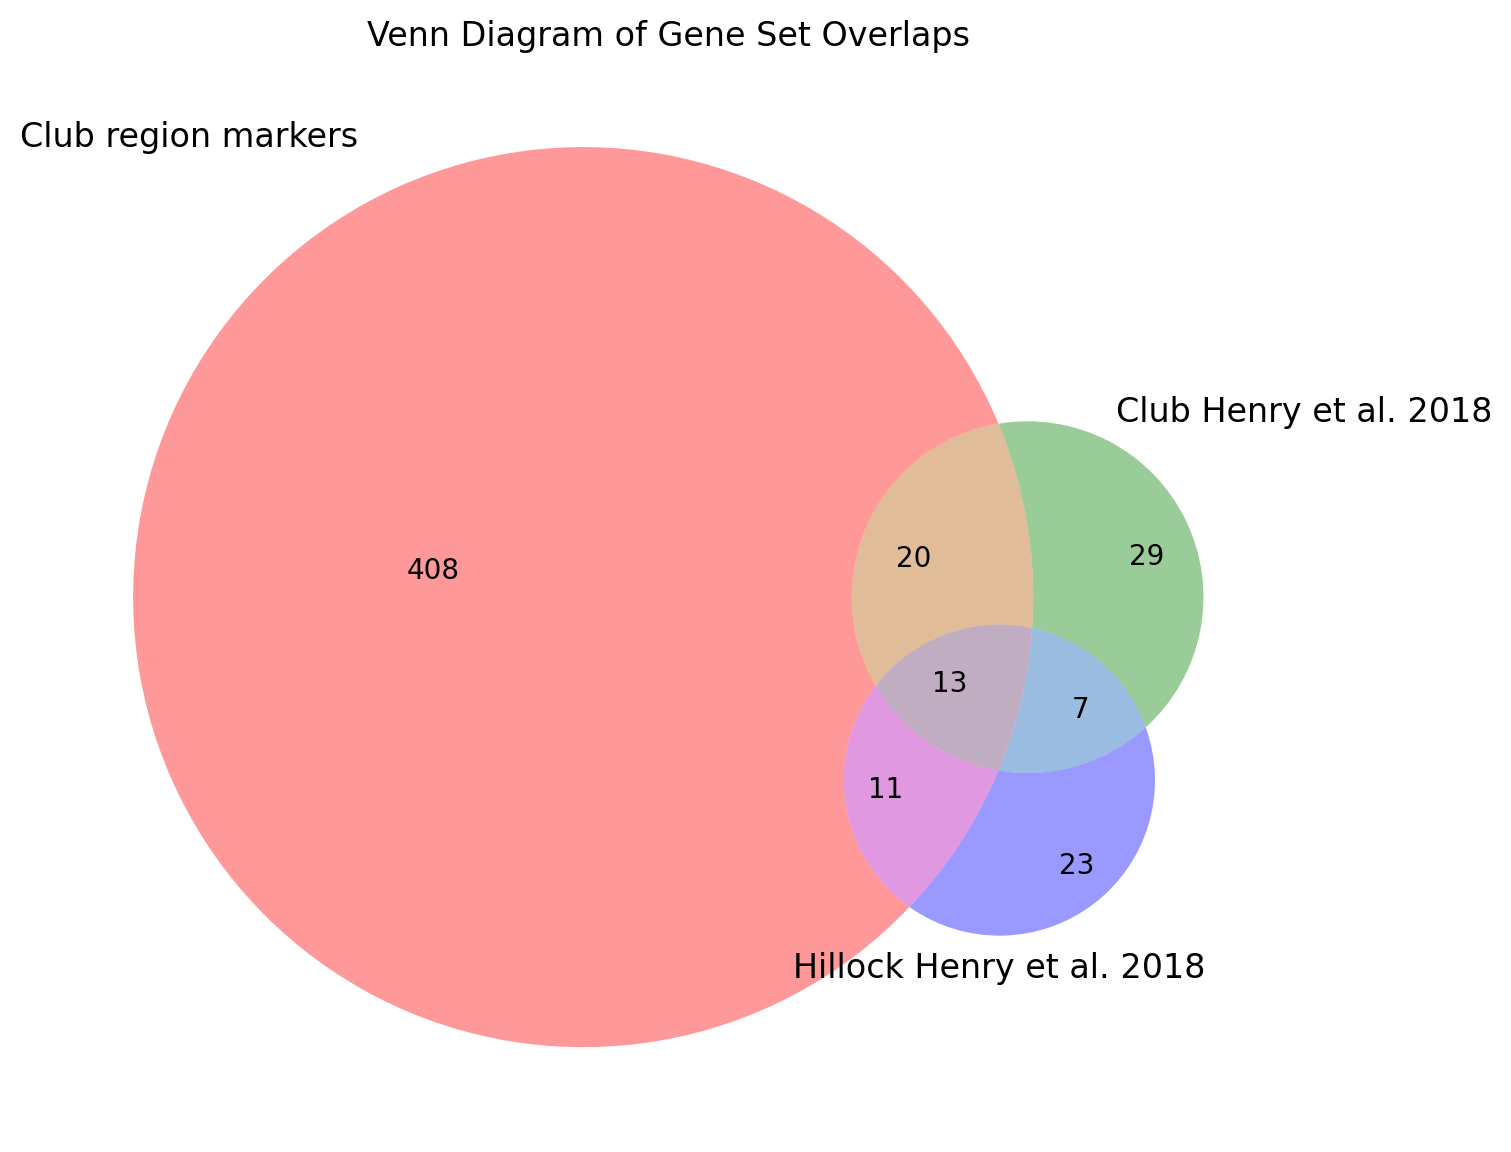

In [31]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# List of gene set names
signatures = ['Club region markers', 'Club Henry et al. 2018', 'Hillock Henry et al. 2018', ]

# Extract the gene sets from the dictionary
set1 = set(gene_modules_dict[signatures[0]])
set2 = set(gene_modules_dict[signatures[1]])
set3 = set(gene_modules_dict[signatures[2]])

# Plot the Venn diagram
plt.figure(figsize=(8, 8))
venn3([set1, set2, set3], set_labels=signatures)
plt.title('Venn Diagram of Gene Set Overlaps')
plt.show()

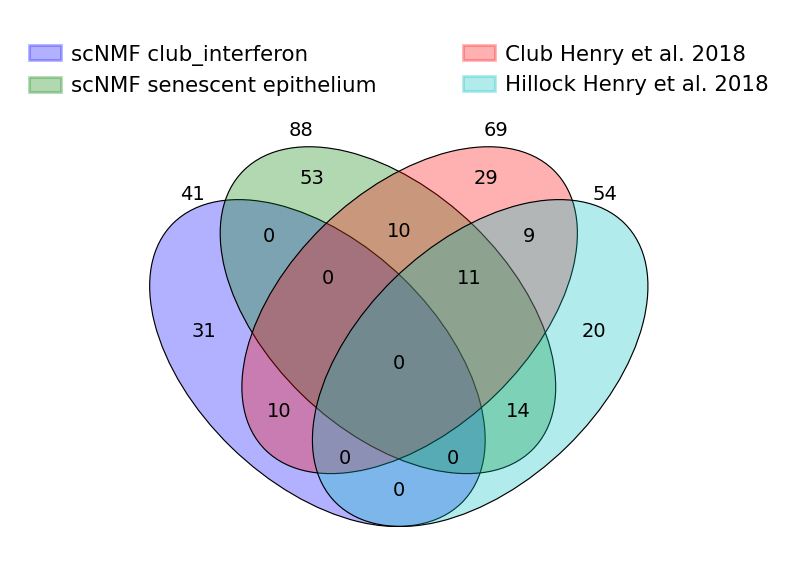

In [20]:
from venny4py.venny4py import *

# List of gene set names
signatures = ['scNMF club_interferon', 'scNMF senescent epithelium', 'Club Henry et al. 2018','Hillock Henry et al. 2018', ]


#dict of sets
sets = {
    signatures[0]: set(gene_modules_dict[signatures[0]]),
    signatures[1]: set(gene_modules_dict[signatures[1]]),
    signatures[2]: set(gene_modules_dict[signatures[2]]),
    signatures[3]: set(gene_modules_dict[signatures[3]]),
}
venny4py(sets=sets)

## Differential gene expression analysis

In [79]:
from statsmodels.stats.multitest import multipletests

def run_differential_expression_test(df1,df2):

    # Create a results_df
    result = pd.DataFrame(index=df1.index, columns=['avg_lfc','stat','p_value'],dtype=np.float64)
    result['avg_lfc'] = df1.mean(axis=1) - df2.mean(axis=1)

    for g in tqdm(df1.index,unit='gene'):
        stat,pval = ranksums(df1.loc[g],df2.loc[g])
        result.loc[g,'stat'] = stat
        result.loc[g,'p_value'] = pval

    # Perform BH correction
    result['adj_pval'] = multipletests(result['p_value'], method='fdr_bh')[1]

    return(result)

In [83]:
# Load the data
rnaseq_data = pd.read_csv('./arneo_rnaseq_data_cpm.csv',index_col=0)
metadata = pd.read_csv('./arneo_rnaseq_metadata.csv',index_col=0)

# Define sample categories
trt_naive = rnaseq_data[metadata[metadata['TRT_GROUP'] == 'treatment-naive'].index]
adt_treated = rnaseq_data[metadata[metadata['TRT_GROUP'] == 'adt'].index]
adt_apa_treated = rnaseq_data[metadata[metadata['TRT_GROUP'] == 'adt_apa'].index]

# Run differential expression testing between the sample categories
deg_adt_res = run_differential_expression_test(adt_treated,trt_naive)
deg_adt_apa_res = run_differential_expression_test(adt_apa_treated,trt_naive)


100%|██████████| 16760/16760 [00:21<00:00, 774.22gene/s]


In [84]:
save_excel = False

# Get the upregulated genes
adt_upreg = deg_adt_res[(deg_adt_res['avg_lfc']>= 1) & (deg_adt_res['adj_pval'] < 0.05)].index.tolist()
adt_apa_upreg = deg_adt_apa_res[(deg_adt_apa_res['avg_lfc']>= 1) & (deg_adt_apa_res['adj_pval'] < 0.05)].index.tolist()

arneo_degs_df = pd.DataFrame.from_dict({'adt':adt_upreg,'adt_apa':adt_apa_upreg},orient='index').T

if save_excel:
    # Create a Pandas Excel writer using XlsxWriter as the engine
    with pd.ExcelWriter('arneo_deg_results.xlsx', engine='xlsxwriter') as writer:
        # Write each dataframe to a different worksheet
        deg_adt_res.to_excel(writer, sheet_name='degarelix', index=True)
        deg_adt_apa_res.to_excel(writer, sheet_name='degarelix+apalutamide', index=True)
    writer.save()

# Format the data for easy access
deg_adt_res['treatment_grp'] = 'adt'
deg_adt_apa_res['treatment_grp'] = 'adt_apa'

deg_res = pd.concat([deg_adt_res[['avg_lfc','adj_pval','treatment_grp']],
           deg_adt_apa_res[['avg_lfc','adj_pval','treatment_grp']]
])

### Volcano plots

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


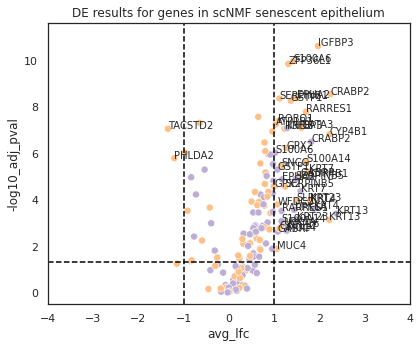

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


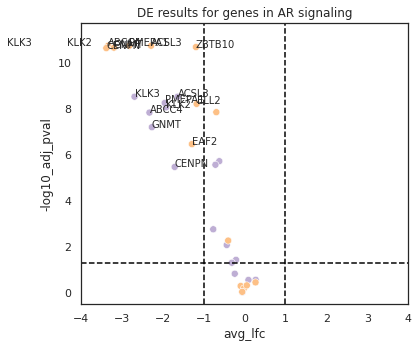

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


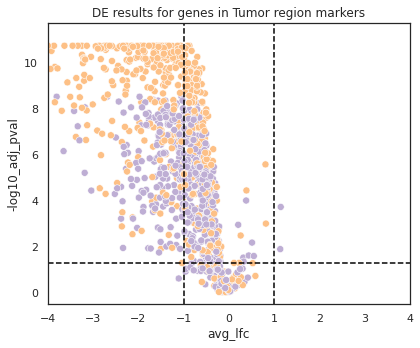

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


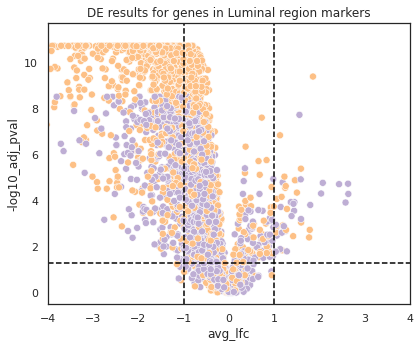

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


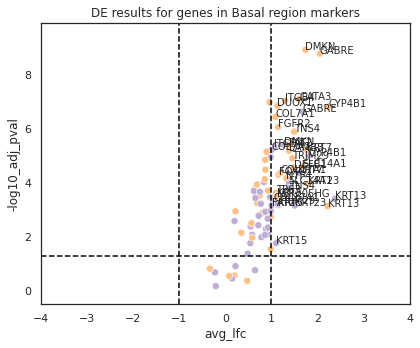

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


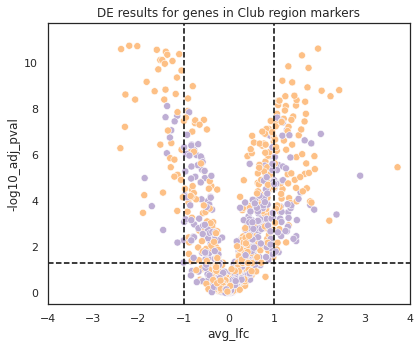

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


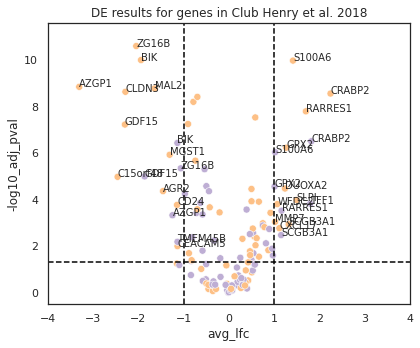

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


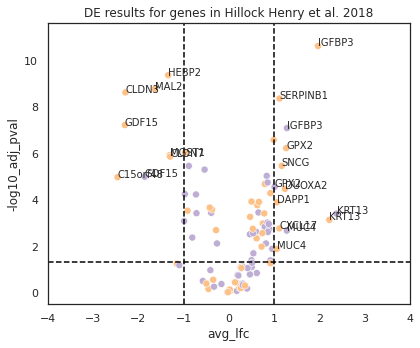

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


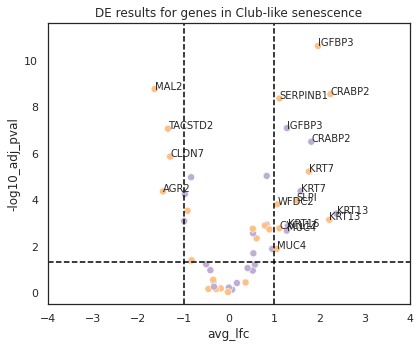

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


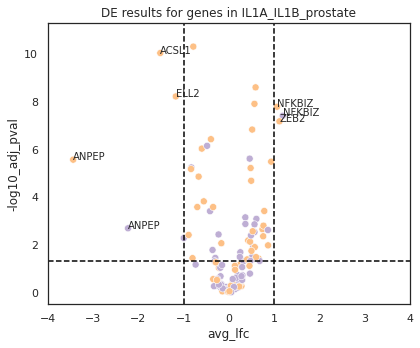

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


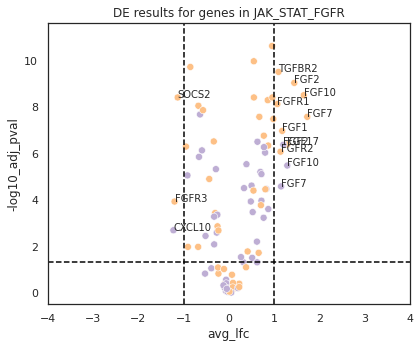

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


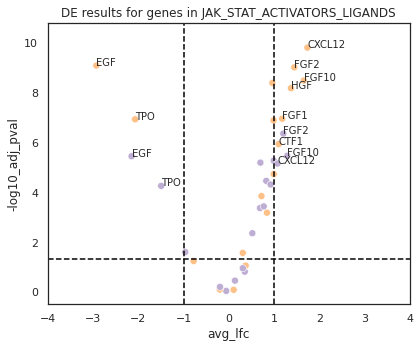

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


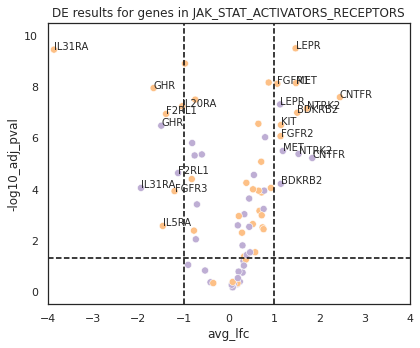

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


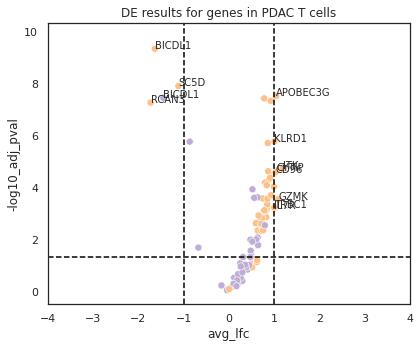

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


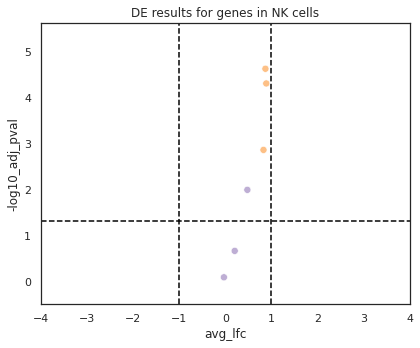

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


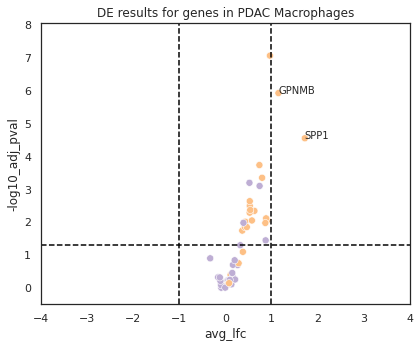

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


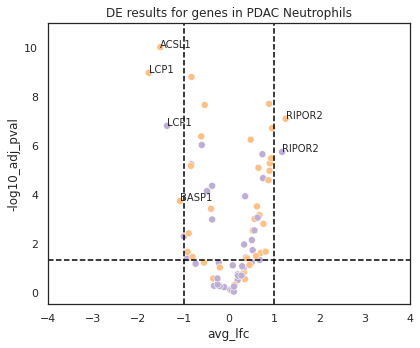

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


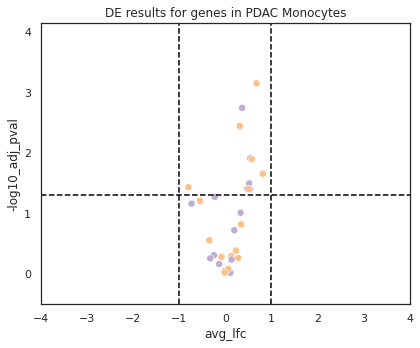

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


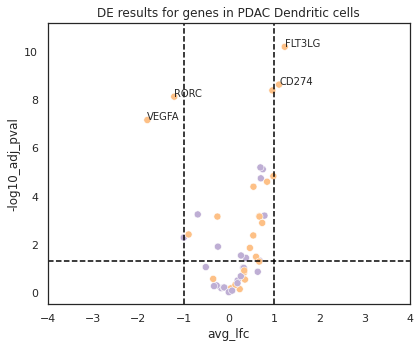

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


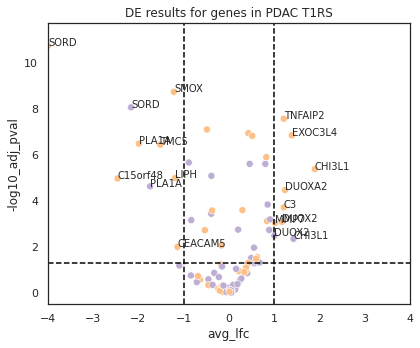

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


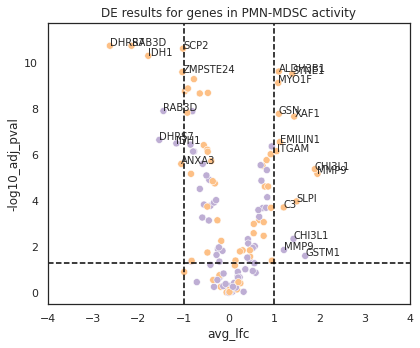

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


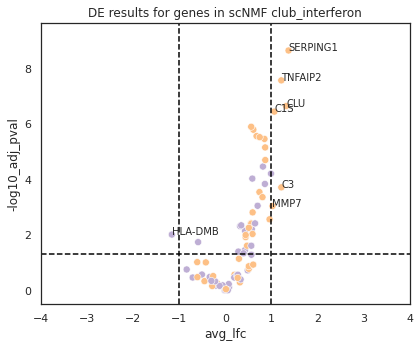

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


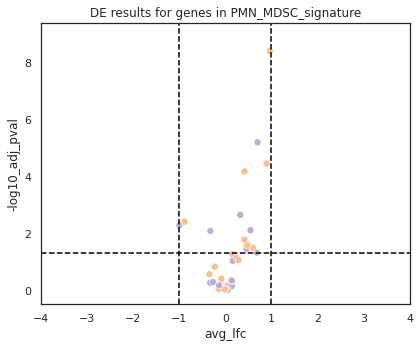

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


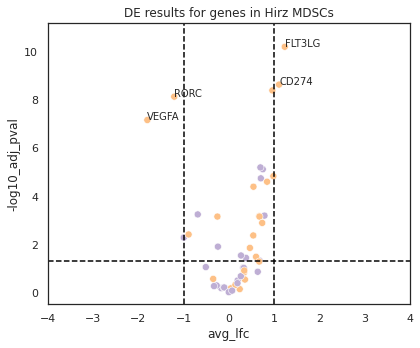

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


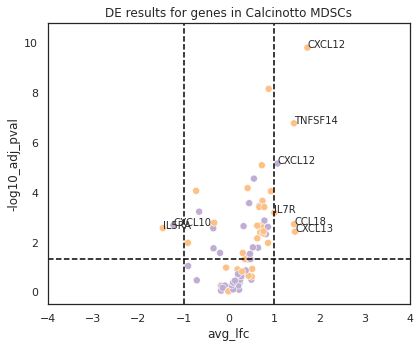

<ipython-input-85-fd3538679756>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]


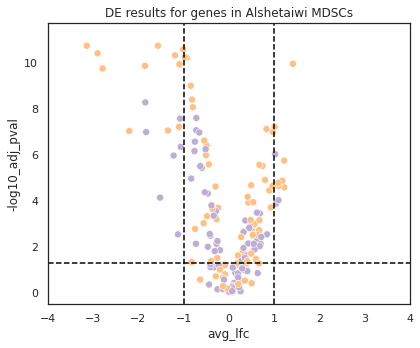

In [85]:
sns.set_theme(style='white', palette='Accent')

for col_name in gene_modules_dict.keys():
    
    plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]

    plot_df['-log10_adj_pval'] = -np.log10(plot_df['adj_pval'])
    plot_df['treatment_grp'] = pd.Categorical(plot_df['treatment_grp'], categories=['treatment-naive', 'adt', 'adt_apa'])

    fig, ax = plt.subplots(figsize=(6,5))
    sns.scatterplot(data=plot_df,
                    x='avg_lfc',
                    y='-log10_adj_pval',
                    s=50,
                    hue='treatment_grp',
                    legend=False,
                    ax=ax)

    ax.set_xlim(-4, 4)
    ax.set_ylim(-0.5, plot_df['-log10_adj_pval'].max() + 1)
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--')
    ax.axvline(x=-1, color='black', linestyle='--')
    ax.axvline(x=1, color='black', linestyle='--')

    ax.set_title(f'DE results for genes in {col_name}')

    if len(gene_modules_dict[col_name]) < 100:
        # Adding gene name labels
        for i in range(len(plot_df)):
            if np.abs(plot_df['avg_lfc'].iloc[i]) >= 1 and plot_df['adj_pval'].iloc[i] < 0.05:
                ax.text(plot_df['avg_lfc'].iloc[i], 
                        plot_df['-log10_adj_pval'].iloc[i], 
                        plot_df.index[i], 
                        fontsize=10, 
                        ha='left')

    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    
    gene_set = col_name.replace(' ','_')
    plt.savefig(plot_save_path + f'{gene_set}_degs_volcano_plot.pdf')

    plt.show()


In [101]:
# Genes that are DEGs in both treatments
col_name = 'scNMF senescent epithelium'
plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]

df = plot_df[(plot_df['avg_lfc'] >= 1) & (plot_df['adj_pval'] < 0.05)]
df = df.reset_index().groupby('index').mean().sort_values('avg_lfc')
df

<ipython-input-101-016cfa590900>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plot_df = deg_res.loc[set(gene_modules_dict[col_name]).intersection(deg_res.index)]
<ipython-input-101-016cfa590900>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.reset_index().groupby('index').mean().sort_values('avg_lfc')


,avg_lfc,adj_pval
index,,
ATP1B1,1.036327,5.850569e-08
WFDC2,1.069765,1.599008e-04
ROBO1,1.087651,4.235279e-08
CXCL17,1.117936,1.720145e-03
SERPINB1,1.120257,4.462523e-09
GPX2,1.139761,1.436469e-05
SNCG,1.170903,3.509536e-06
MUC4,1.171812,7.627203e-03
GSTP1,1.220630,2.547115e-06
